In [10]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from matplotlib.image import imread
import tensorflow as tf

In [2]:
import zipfile
with zipfile.ZipFile("kagglecatsanddogs_5340.zip","r") as zipped:
    zipped.extractall(".")

In [37]:
import os

path1 = "PetImages\Dog"
path2 = "PetImages\Cat"
list_cats_and_dogs = []
file_cat_or_dog = []
folder_dog = os.listdir(path1)
folder_cat = os.listdir(path2)
images = []
for file in folder_dog:
    try:
        img = imread(f"{path1}\{file}")
        img = tf.image.resize(img,(128,128))
        img = img/np.amax(img)
        img = np.clip(img, 0, 1)
        list_cats_and_dogs.append(1)
        file_cat_or_dog.append(f"Dog\{file}")  
        images.append([img, "Dog"])
    except: 
        pass
    
for file2 in folder_cat:
    list_cats_and_dogs.append(0)
    file_cat_or_dog.append(f"Cat\{file2}")
    
df = pd.DataFrame({
    'filepath' : file_cat_or_dog,
    'category' : list_cats_and_dogs
})

In [5]:
df.head()

,filepath,category
0,Dog\0.jpg,1
1,Dog\1.jpg,1
2,Dog\10.jpg,1
3,Dog\100.jpg,1
4,Dog\1000.jpg,1


In [6]:
df.tail()

,filepath,category
24997,Cat\9996.jpg,0
24998,Cat\9997.jpg,0
24999,Cat\9998.jpg,0
25000,Cat\9999.jpg,0
25001,Cat\Thumbs.db,0


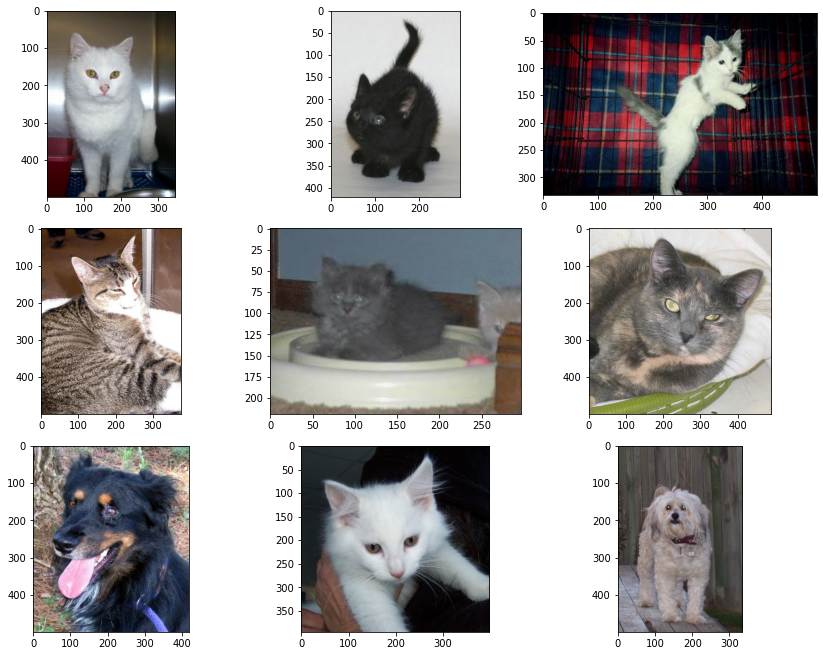

In [7]:
import random

path = "PetImages"
plt.figure(figsize=(12, 12))
for i in range(0, 9):
    plt.subplot(4, 3, i+1)
    sample = random.choice(file_cat_or_dog)
    filename = path+'/'+sample
    image = imread(filename)
    plt.imshow(image)
plt.tight_layout()
plt.show()